In [75]:
import json
import pandas as pd

In [76]:
file = open("tweets_DM.json", 'r', encoding='utf-8')
papers = []
for line in file.readlines():
    dic = json.loads(line)
    papers.append(dic)
df = pd.DataFrame.from_dict(pd.json_normalize(papers), orient='columns')
df

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [77]:
df = df.set_axis(['score', 'index', 'crawldate', 'type', 'hashtag', 'tweet_id', 'tweet_text'], axis=1)
df = df.drop(columns=['score', 'index', 'crawldate', 'type', 'hashtag'])
df

,tweet_id,tweet_text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [78]:
df_emotion = pd.read_csv("./emotion.csv") 
df_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [79]:
df_concat=pd.merge(df, df_emotion, on='tweet_id')
df_concat

,tweet_id,tweet_text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [27]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(df_concat['emotion'])
# y

array([1, 5, 3, ..., 4, 4, 4])

In [7]:
# y = pd.DataFrame(y)
# y

,0
0,1
1,5
2,3
3,4
4,1
...,...
1455558,4
1455559,4
1455560,4
1455561,4


In [80]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(df_concat['tweet_text'], df_concat['emotion'])

In [83]:
list(train_X)

['Issa problem. Issa was was looking at dick pics while driving. <LH> <LH>',
 'There needs to be an Emmy Award for television shows that provide free tampons to their employees so I can nominate @ILYAmerica. <LH>',
 "When praising <LH> we give glory to Him - we're saying you are impressive, weighty!",
 'What a day has come, now we have to use Twitter and social media for our result.!! <LH> @PMOIndia @DoPTGoI  #SSCCHSL2015 #SaveSSCchsl2015',
 'Tony Romo is like a coked up John Gruden. #yelling <LH> #nfl',
 'I don’t even know what I want anymore. <LH>',
 "It's not 'failing'.  You're KILLING it.  #Inners #ACA #LIARS #DeathCare #SenatorMIkeRounds <LH>",
 '@TurnbullMalcolm #God, and afflicted. But He was #wounded for our #transgressions, He was bruised for our #iniquities; The [2/4]',
 'New camera comes in tomorrow! <LH>',
 '@jamescaan Ha Ha another meow on #SnowDay <LH> lol So adorable cat meow again meow.....',
 'Moment of silence while tears were running down my face. #LasVegasShooting <

In [20]:
# def get_tweets(data):
#     tweets = [x['tweet_text'] for x in data]
#     return tweets

In [84]:
tweets = list(train_X)
labels = list(train_y)

In [85]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[3]]))

[[34, 6, 37, 68, 105, 58, 31, 24, 4, 340, 233, 8, 786, 601, 9, 66, 1780, 2, 5400, 1, 1, 1]]


In [86]:
import nlp

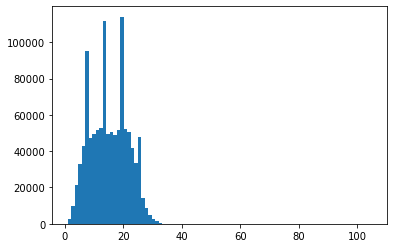

In [87]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import random
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [88]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [105]:
padded_train_sequences = get_sequences(tokenizer, tweets)
padded_train_sequences[3]

array([  34,    6,   37,   68,  105,   58,   31,   24,    4,  340,  233,
          8,  786,  601,    9,   66, 1780,    2, 5400,    1,    1,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

{'anticipation', 'sadness', 'joy', 'trust', 'fear', 'anger', 'disgust', 'surprise'}


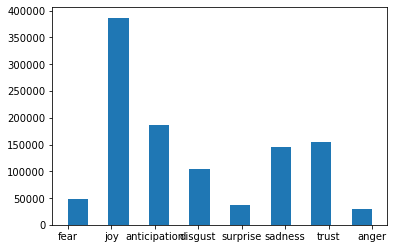

In [95]:
classes = set(labels)
print(classes)
plt.hist(labels, bins=15)
plt.show()

In [96]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())
classes_to_index

{'anticipation': 0,
 'sadness': 1,
 'joy': 2,
 'trust': 3,
 'fear': 4,
 'anger': 5,
 'disgust': 6,
 'surprise': 7}

In [97]:
index_to_classes

{0: 'anticipation',
 1: 'sadness',
 2: 'joy',
 3: 'trust',
 4: 'fear',
 5: 'anger',
 6: 'disgust',
 7: 'surprise'}

In [98]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [99]:
train_labels = names_to_ids(labels)
print(train_labels[0])
train_labels.shape

4


(1091672,)

In [100]:
val_tweets = list(val_X)
val_labels = list(val_y)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [101]:
val_tweets[0], val_labels[0]

('Looking for <LH> <LH> on Twitter? Better check out and follow @Jerzup now guys!',
 2)

In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 328       
Total params: 176,008
Trainable params: 176,008
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Train on 1091672 samples, validate on 363891 samples
Epoch 1/10
1091672/1091672 [==============================] - 217s 199us/sample - loss: 1.1849 - accuracy: 0.5727 - val_loss: 1.1751 - val_accuracy: 0.5754
Epoch 2/10
1091672/1091672 [==============================] - 217s 199us/sample - loss: 1.1345 - accuracy: 0.5903 - val_loss: 1.1514 - val_accuracy: 0.5849
Epoch 3/10
1091672/1091672 [==============================] - 217s 199us/sample - loss: 1.1077 - accuracy: 0.6003 - val_loss: 1.1428 - val_accuracy: 0.5871
Epoch 4/10
1091672/1091672 [==============================] - 217s 199us/sample - loss: 1.0908 - accuracy: 0.6066 - val_loss: 1.1421 - val_accuracy: 0.5884
Epoch 5/10
1091672/1091672 [==============================] - 217s 199us/sample - loss: 1.0788 - accuracy: 0.6111 - val_loss: 1.1444 - val_accuracy: 0.5892
Epoch 6/10
1091672/1091672 [==============================] - 217s 199us/sample - loss: 1.0697 - accuracy: 0.6144 - val_loss: 1.1417 - val_accuracy: 0.5890
Epoch 7/10


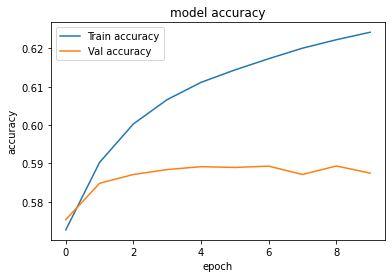

In [109]:
# Answer here
# summarize history for accuracy
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper left')
plt.show()

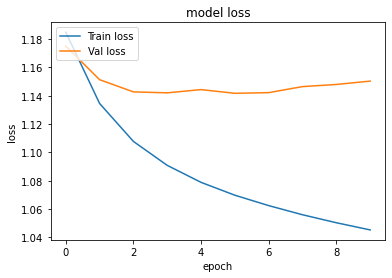

In [110]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper left')
plt.show()

In [111]:
df_identification = pd.read_csv("./data_identification.csv") 

In [112]:
df_test=pd.merge(df, df_identification, on='tweet_id')
df_test

,tweet_id,tweet_text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [113]:
df_test = df_test[df_test["identification"]=="test"]
df_test.reset_index(drop=True, inplace=True)
df_test = df_test.drop(columns=["identification"])
df_test

,tweet_id,tweet_text
0,0x28b412,"Confident of your obedience, I write to you, k..."
1,0x2de201,"""Trust is not the same as faith. A friend is s..."
2,0x218443,When do you have enough ? When are you satisfi...
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
4,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th..."
411968,0x2a980e,"""There is a lad here, which hath five barley l..."
411969,0x316b80,When you buy the last 2 tickets remaining for ...
411970,0x29d0cb,I swear all this hard work gone pay off one da...


In [114]:
test_tweets = list(df_test['tweet_text'])
test_sequences = get_sequences(tokenizer, test_tweets)
# test_labels = names_to_ids(test_labels)

In [117]:
predict_y.shape

(411972, 8)

In [121]:
predict_y = model.predict_classes(test_sequences)
predict_y

array([0, 0, 2, ..., 1, 5, 1])

In [124]:
ids_to_names = lambda labels: np.array([index_to_classes.get(x) for x in labels])

In [125]:
result_df = ids_to_names(predict_y)
result_df

array(['anticipation', 'anticipation', 'joy', ..., 'sadness', 'anger',
       'sadness'], dtype='<U12')

In [126]:
result_df = pd.DataFrame(result_df)
result_df

,0
0,anticipation
1,anticipation
2,joy
3,joy
4,trust
...,...
411967,anticipation
411968,anticipation
411969,sadness
411970,anger


In [127]:
result_df = pd.concat([df_test['tweet_id'], result_df], axis=1)
result_df.columns = ['id','emotion']
result_df

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,anger


In [128]:
result_df.to_csv("./DM_RNN_all.csv", index=False)